# EDA Project - BMI Case Study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

import statistics as sts

import scipy.stats as stats
from  pylab import rcParams 
import json

In [3]:
#create a Data Frame based on the input

data= { 'price':[
23, 30, 20, 27, 44, 26, 35, 20, 29, 29,
25, 15, 18, 27, 19, 22, 12, 26, 34, 15,
27, 35, 26, 43, 35, 14, 24, 12, 23, 31,
40, 35, 38, 57, 22, 42, 24, 21, 27, 33
]}

In [4]:
df = pd.DataFrame(data)
df.head(5)

,price
0,23
1,30
2,20
3,27
4,44


In [7]:
# Copy of the main data is created for furthur use
df_cpy = df.copy()

# Q1 - Compute the mean, median and the mode of the data

In [8]:
# Mean
df_mean  = df.mean()
print('Mean of the Price :',df_mean)

Mean of the Price : price    27.625
dtype: float64


In [9]:
# Median
df_median  = df.median()
print('Median of the Price :',df_median)

Median of the Price : price    26.5
dtype: float64


In [10]:
# Mode
df_mode  = df.mode()
print('Mode of the Price :',df_mode)

Mode of the Price :    price
0     27
1     35


# Q2. Compute the range, variance and standard deviation of Price

In [11]:
#Range
df_range = df.max() - df.min()
print('Range of the Price:',df_range)

Range of the Price: price    45
dtype: int64


In [12]:
#variance
df_var = df.var()
print('Variance of the Price:',df_var)

Variance of the Price: price    92.599359
dtype: float64


In [13]:
#Standard Deviation
df_std = df.std()
print('Standard Deviation of the Price:',df_std)

Standard Deviation of the Price: price    9.622856
dtype: float64


# Q3. Find the mean deviation for the data. 

In [5]:
n = len(df)
df_mdev =np.sum((np.abs(df-df.mean())/len(df)))
print('Mean deviation for the data:',df_mdev)

Mean deviation for the data: price    7.4
dtype: float64


In [14]:
n = len(df)
df_mdev = (df - df.mean())/n
print('Mean deviation for the data:',df_mdev)

Mean deviation for the data:        price
0  -0.115625
1   0.059375
2  -0.190625
3  -0.015625
4   0.409375
5  -0.040625
6   0.184375
7  -0.190625
8   0.034375
9   0.034375
10 -0.065625
11 -0.315625
12 -0.240625
13 -0.015625
14 -0.215625
15 -0.140625
16 -0.390625
17 -0.040625
18  0.159375
19 -0.315625
20 -0.015625
21  0.184375
22 -0.040625
23  0.384375
24  0.184375
25 -0.340625
26 -0.090625
27 -0.390625
28 -0.115625
29  0.084375
30  0.309375
31  0.184375
32  0.259375
33  0.734375
34 -0.140625
35  0.359375
36 -0.090625
37 -0.165625
38 -0.015625
39  0.134375


# Q4. Calculate the Pearson coefficient of skewness and comment on the skewness of the data

In [15]:
df_skew = 3*(df.mean() - df.median())/df.std()
print('Pearson coefficient of skewness',df_skew)

Pearson coefficient of skewness price    0.350727
dtype: float64


In [ ]:
# From the skewness value it can be inferred that as skewness is positive so the distibution is positively skewed.

# Q5. Count the number of data values that fall within one standard deviation of the mean. 
#Compare this with the answer from Chebyshev’s Theorem.

In [16]:
# finding 1 standard deviation value
max1 = df_mean + df_std
max1

price    37.247856
dtype: float64

In [17]:
min1 = df_mean - df_std
min1

price    18.002144
dtype: float64

In [18]:
df[(df < max1) & (df > min1)].count()

price    28
dtype: int64

In [ ]:
# There are 28 data values fall within one standard deviation of the mean.

# Q6. Find the three quartiles and the interquartile range (IQR).

In [20]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
iqr = q3-q1
print('Inter Quartile Range (IQR):',iqr)

Q1: 21.75
Q2: 26.5
Q3: 34.25
Inter Quartile Range (IQR): 12.5


# Q7. Are there any outliers in the data set ?

In [21]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
iqr = q3-q1
print('Inter Quartile Range (IQR):',iqr)

max1 = q3 + 1.5* iqr
min1 = q1 - 1.5* iqr

print('Max value:' ,max1)
print('Min Value:' ,min1)

Q1: 21.75
Q2: 26.5
Q3: 34.25
Inter Quartile Range (IQR): 12.5
Max value: 53.0
Min Value: 3.0


In [22]:
outliers = df[(df > max1) | (df < min1)]
outliers.count()

price    1
dtype: int64

In [ ]:
# 1 outliers are present in the dataset.

# Q8. Draw a boxplot of the dataset to confirm.

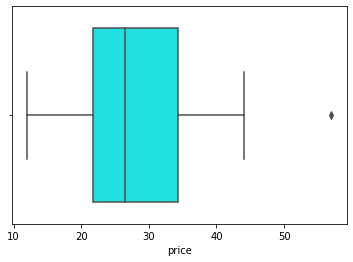

In [23]:
sns.boxplot(df['price'],color = 'cyan')
plt.show()

In [ ]:
#From the above boxplot we can confirm that 1 outliers are present in the dataset

# Q9. Find the percentile rank of the datapoint 25.0.

In [6]:
df_p_rank = df.rank(pct =True)
df_p_rank

,price
0,0.3375
1,0.6750
2,0.2125
3,0.5625
4,0.9750
5,0.4750
6,0.8125
7,0.2125
8,0.6375
9,0.6375


In [7]:
percent_rank = df.rank(pct = True)
percent_rank.iloc[25,:]

price    0.075
Name: 25, dtype: float64

In [8]:
percent_rank =df.rank()
df['Rank'] = df.rank(pct = True)

In [9]:
df[df.price == 25]

,price,Rank
10,25,0.425


## Q10. What is the probability that a shirt cost(price) is above 25 dollars?

In [31]:
x = df[df['price']>25.0].count()

In [32]:
n = len(df)

In [33]:
p = (x/n)*100
print('Probability that a shirt cost(price) above 25.0 is',p[0],'%')

Probability that a shirt cost(price) above 25.0 is 57.49999999999999 %


## Q11. Create a frequency distribution for the data and visualize it appropriately

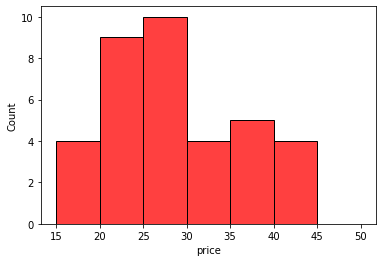

In [35]:
sns.histplot(x = 'price',data = df, bins = [15,20,25,30,35,40,45,50],color = ['red'])
plt.show()

<AxesSubplot:>

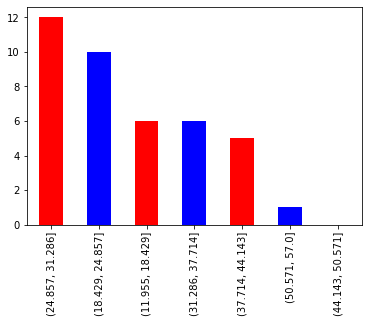

In [37]:
#Additional Method
pd.cut(df['price'],bins = 7).value_counts().plot(kind = 'bar',color = ['red','blue'])

## Q12. Create a probability distribution of the data and visualize it appropriately.

In [39]:
df_cpy['Prob_Dist'] = df_cpy['price'].rank(pct = True)
df_cpy.head(5)

,price,Prob_Dist
0,23,0.3375
1,30,0.6750
2,20,0.2125
3,27,0.5625
4,44,0.9750


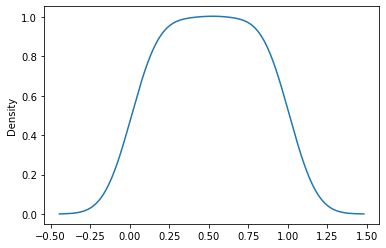

In [40]:
df['price'].rank(pct=True).plot(kind = 'kde')
plt.show()

## Q13. What is the shape of the distribution of this dataset? 
Create an appropriate graph to determine that. Take 100 random samples with replacement from this dataset of size 5 each.
Create a sampling distribution of the mean age of customers. 
Compare with other sampling distributions of sample size 10, 15, 20, 25, 30. 
State your observations. Does it corroborate the Central Limit Theorem?

<AxesSubplot:xlabel='price', ylabel='Density'>

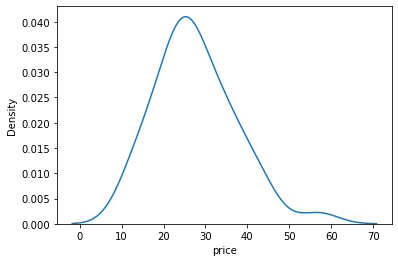

In [61]:
sns.kdeplot(df['price'])

## Q14. Treat this dataset as a binomial distribution where p is the probability that a shirt costs above 25 dollars. What is the probability that out of a random sample of 10 shirts 7 are costing more than 25 dollars

In [41]:
x = df[df['price']>25.0].count()
n = len(df)

In [42]:
prob = (x/n)
samp = 10
x1 = 7

stats.binom.pmf(x1,samp,prob)*100

array([19.14357081])

In [ ]:
#There is 19.14% the probability that out of a random sample of 10 shirts are having price greater than 25.0

## Q15. NuCloth Claims that 60% of all shirts in their website cost less than 25 dollars . Using the Normal approximation of a Binomial distribution, find the probability that in a random sample of 10 shirts 7 of them will cost less than 25 dollars.

[ Note that the normal distribution can be used to 
 approximate a binomial distribution if np>=5 and nq>=5 with the following correction for continuity
P(X=z) = P(z-0.5 < X < z+0.5 ) ]

In [44]:
p = 0.60
n = 10
x = 7

stats.binom.pmf(x,n,p) 

0.21499084799999976

In [ ]:
#There is 21 % probability that in a random sample of 10 shirt
# 7 of them will have will have a price is less than 25.0.

## Q16. Compute a 95% Confidence Interval for the true price of a shirt in the NuCloth website using appropriate distribution.
( State reasons as to why did you use a z or t distribution)


In [45]:
x_bar = df.mean()
sigma = df.std()
n = len(df)

In [46]:
interval = stats.norm.interval(0.95,loc = x_bar,scale = sigma/n**0.5)
interval

(array([24.64290081]), array([30.60709919]))

In [ ]:
# As our samples are greater than 30 so we are using the Z distribution

In [ ]:
#Proportion of 95% Confidence Interval for the true price of a shirt in the NuCloth website is (24.64290081,30.60709919)

## Q17. A data scientist wants to estimate with 95% confidence the true proportion of shirts having price greater than 25 dollars in the NuCloth website. A recent study showed that 60% of all shirts have a price greater than 25 dollars. The data scientist wants to be accurate within 2% of the true proportion. Find the minimum sample size necessary.


In [47]:
alpha = 0.05
z_alpha_2 = stats.norm.isf(alpha/2)
sigma = df.std()
margin_error = 2

In [48]:
n1 = ((z_alpha_2*sigma)/margin_error)**2
print(round(n1[0]))

89


In [ ]:
# from the above data we can inferred that minimum sample required are 89

## Q18. The same data scientist wants to estimate the true proportion of shirts having price greater than 25 dollars. She wants to be 90% confident and accurate within 5% of true proportion. Find the minimum sample size necessary.

In [49]:
alpha = 0.1
z_alpha_2 = stats.norm.isf(alpha/2)
sigma = df.std()
margin_error = 5

In [50]:
n2 = ((z_alpha_2*sigma)/margin_error)**2
print(round(n2[0]))

10


In [51]:
# from the above data we can inferred that minimum sample required are 10

## Q19. NuCloth claims that currently 80% of all shirts have prices greater than 25 dollars . Test this claim with an alpha =0.05 if out of a random sample of 30 shirts only 23 are having prices above 25 dollars.

In [54]:
#H0: p = 0.8
#H1: p != 0.8
n=30

p_samp = 23/30

# hypothesized proportion
hypo_p = 0.8 

# calculate test statistic value for 1 sample proportion test
z_stat = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)
p_value = stats.norm.sf(z_stat)
print('Test statistic:', z_stat)
print('p-value:', p_value)

Test statistic: -0.45643546458763834
p-value: 0.6759615659304269


In [ ]:
# Inference :
# p_value > 0.05, so we fail to reject H0
# we failed to reject null so claim is true that currently 80% of all shirts have prices greater than 25 dollars

## Q20. A data scientist is researching the hypothesis that the average price of a shirt in NuCloth is higher than the supermarket. So he collects data from NuCloth and the supermarket that the average shirt price of shirts in NuCloth is 36 dollars vs 34 dollars in the supermarket. The standard deviations are 7.6 and 5.8 respectively.Suppose the data scientist got these values after randomly selecting 100 shirts from each place.

a. What hypothesis would he use to compare the shirt prices of NuCloth vs Supermarket

b. What are critical values to be used?

c. What statistical test will be used to compare these prices?

d. Complete the test and obtain the P-value.

e. Summarize his conclusion based on the P-value

In [57]:
# H0: mu1 - mu2 <= 0
# H1: mu1 - mu2 > 0

#H1: NuCloth - Supermarket > 0
#H0: NuCloth - Supermarket <= 0

n1 = 100
x1_bar = 36
s1 = 7.6

n2 = 100
x2_bar = 34
s2 = 5.8

# degrees of freedom for 2 sample t-test
print('Degrees of freedom:', n1 + n2 - 2)

Degrees of freedom: 198


In [58]:
# calculate critical value )
t_critical = stats.t.isf(q = 0.05,df = 198)
print('Critical values for two-tailed t-test:', - t_critical, 'and', t_critical)

Critical values for two-tailed t-test: -1.6525857836172082 and 1.6525857836172082


In [59]:
# calculate pooled standard deviation
s = np.sqrt((((n1-1)*s1**2) + ((n2-1)*s2**2)) / (n1 + n2 - 2))
t_stat = (x1_bar - x2_bar) / (s * np.sqrt(1/n1 + 1/n2))
print('Test Statistic:', t_stat)

Test Statistic: 2.0919769632765197


In [60]:
p_value = 2 * stats.t.cdf(t_stat, df = 27)   
# for a two-tailed test multiply the p-value by 2
print('p-value:', p_value)

p-value: 1.9540227383900604


In [ ]:
# Since p_value > level of significance, therefore Fail to Reject H0,
#i.e the average price of a shirt in NuCloth is higher than the supermarket